#Projeto

Ajudar uma equipe de RH a identificar pessoas que podem deixar a empresa. A equipe gostaria de se antecipar para evitar a saída de um funcionário para propor antes da sua saída algum tipo de incentivo e assim o funcionário poderia permanecer na empresa



# Exploração dos Dados


In [ ]:
import pandas as pd # importando bibliotecas

In [ ]:
base = pd.read_csv("/content/modelagem_rh.csv") # abrindo base de dados

In [ ]:
base.shape # quantidades de colunas e registros


(14999, 10)

In [ ]:
base.head() # Lendo as primeiras linhas

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
base.saiu.value_counts() # Verificando qauntidades de registros da coluna alvo / binária (0 - Não saiu / 1 - saiu)

0    11428
1     3571
Name: saiu, dtype: int64

In [ ]:
base.saiu.value_counts()/len(base)*100 # Verificando a proporção de porcentagem de saiu e não saiu

0    76.191746
1    23.808254
Name: saiu, dtype: float64

In [ ]:
import matplotlib.pyplot as plt # importando biblioteca de grafico

In [ ]:
#%matplotlib inline # Abrir gráfico no notebook

UsageError: unrecognized arguments: # Abrir gráfico no notebook


<Axes: >

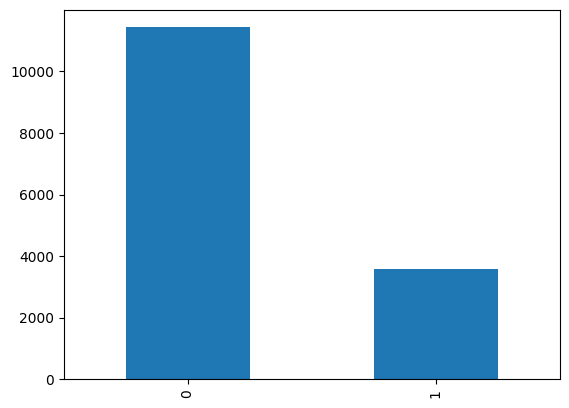

In [ ]:
base.saiu.value_counts().plot(kind='bar') # Montar gráfico de barras

([<matplotlib.axis.XTick at 0x786917c4c7c0>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

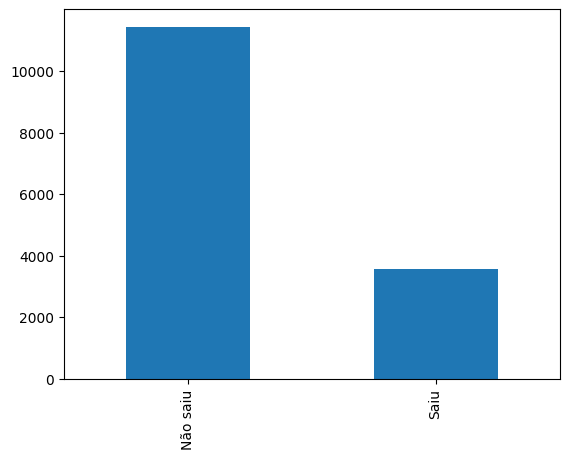

In [ ]:
base.saiu.value_counts().plot(kind='bar')
plt.xticks((0,1), ['Não saiu', 'Saiu']) #Alterando rótulos de 0 e 1

In [ ]:
pd.crosstab(base.departamento, base.saiu) # quantidade de funcionários que sairam por departamento

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [ ]:
valores = pd.crosstab(base.departamento, base.saiu)

In [ ]:
soma =  valores.sum(axis=1) # Somar quantidade de funcionários no total por departamento

In [ ]:
soma

departamento
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [ ]:
valores.divide(soma, axis=0)*100 # Porcentagem de funcionários por departamento (proporção)

saiu,0,1
departamento,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


In [ ]:
pd.crosstab(base.salario, base.saiu) # Salários de funcionários

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [ ]:
valores_salario = pd.crosstab(base.salario, base.saiu)
soma_salario = valores_salario.sum(axis=1)

In [ ]:
valores_salario.divide(soma_salario, axis=0)*100 # proporção de saidas e não saidas por salários

saiu,0,1
salario,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


In [ ]:
porc_salario = valores_salario.divide(soma_salario, axis=0)*100

<Axes: xlabel='salario'>

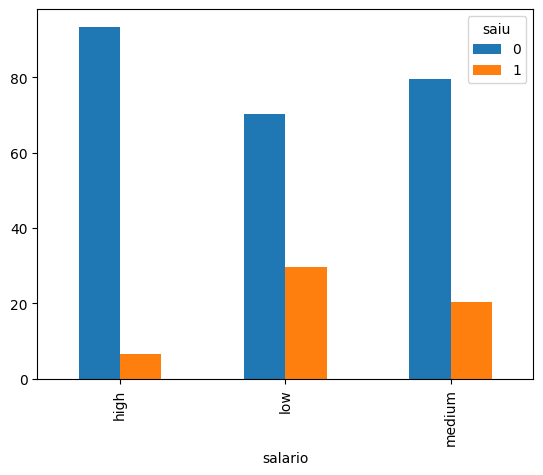

In [ ]:
porc_salario.plot(kind='bar') # Gráfico mostrando proporção de saidas/não saida por salários

<Axes: xlabel='salario'>

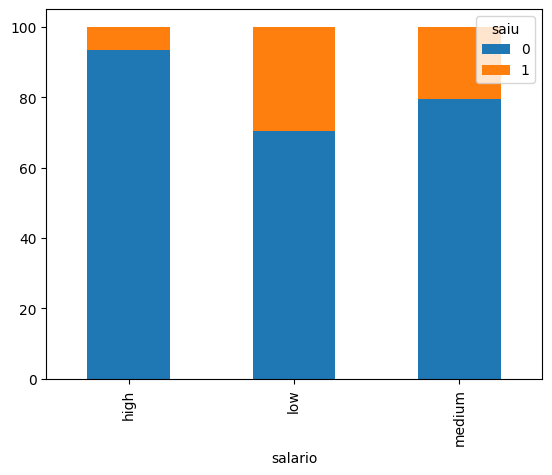

In [ ]:
porc_salario.plot(kind='bar', stacked=True) # Barra empilhada

# Preparação de valores ausentes - DATAPREP

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
base.isnull().sum() # Verificando valores ausentes

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [ ]:
base.nivel_satisfacao.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Name: nivel_satisfacao, Length: 14999, dtype: bool

In [ ]:
base.loc[base.nivel_satisfacao.isnull(), 'nivel_satisfacao'] = \
base.nivel_satisfacao.mean() # imputar média dos valores nos valores ausentes

In [ ]:
base.isnull().sum()

nivel_satisfacao      0
ult_avaliacao         0
num_projetos          0
media_horas_mes       0
tempo_empresa         0
aci_trabalho          0
saiu                  0
promocao_ult_5anos    0
departamento          0
salario               0
dtype: int64

# Preparação dos dados variáveis categóricas e normalização



In [ ]:
base = pd.get_dummies(base, drop_first = True)     # transformar coluna de departamento e salário de categorico p/ binário

In [ ]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
base.max()

nivel_satisfacao              1.0
ult_avaliacao                 1.0
num_projetos                  7.0
media_horas_mes             310.0
tempo_empresa                10.0
aci_trabalho                  1.0
saiu                          1.0
promocao_ult_5anos            1.0
departamento_RandD            1.0
departamento_accounting       1.0
departamento_hr               1.0
departamento_management       1.0
departamento_marketing        1.0
departamento_product_mng      1.0
departamento_sales            1.0
departamento_support          1.0
departamento_technical        1.0
salario_low                   1.0
salario_medium                1.0
dtype: float64

In [ ]:
pd.DataFrame([base.max(), base.min()], index=['max', 'min']) # Criando dataframe com valores minimos e máximos

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
max,1.00,1.00,7.0,310.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame([base.max(), base.min()], index=['max', 'min']).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7.0,2.00
media_horas_mes,310.0,96.00
tempo_empresa,10.0,2.00
aci_trabalho,1.0,0.00
saiu,1.0,0.00
promocao_ult_5anos,1.0,0.00
departamento_RandD,1.0,0.00
departamento_accounting,1.0,0.00


In [ ]:
from sklearn import preprocessing #biblioteca para fazer preparação da normalização do min e max

In [ ]:
x = base.values

In [ ]:
x

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [ ]:
minmax = preprocessing.MinMaxScaler()

In [ ]:
x_scaled = minmax.fit_transform(x)

In [ ]:
x_scaled # todas colunas entre 1 e 0

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
base = pd.DataFrame(x_scaled, columns = base.columns)

In [ ]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
pd.DataFrame([base.max(), base.min()], index=['max', 'min']).T

,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0


# Modelagem

In [ ]:
cols = list(base.columns)

In [ ]:
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'saiu',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [ ]:
cols.remove('saiu') # tirar a coluna saiu da lista

In [ ]:
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [ ]:
X = base[cols]

In [ ]:
y = base['saiu']

In [ ]:
#Importar modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()

In [ ]:
# separar base em treinamento e teste/validação (80% treinamento e 20% validação)
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2)

In [ ]:
print(X_train.shape, X_test.shape) # mostra quantidade de objetos para treinamento e quantidade para validação

(11999, 18) (3000, 18)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predicted = knn.predict(X_test)

In [ ]:
accuracy_score(predicted, y_test) # taxa de acerto

0.9516666666666667

In [ ]:
confusion_matrix(predicted, y_test)

array([[2193,   48],
       [  97,  662]])

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
accuracy_score(tree.predict(X_test), y_test)

0.9803333333333333

In [ ]:
confusion_matrix(tree.predict(X_test), y_test)

array([[2253,   22],
       [  37,  688]])

In [ ]:
from sklearn.model_selection import cross_val_score # validação cruzada

In [ ]:
#acurácia de pastas
scores = cross_val_score(knn, X,y, cv=5, scoring='accuracy')

In [ ]:
scores

array([0.96666667, 0.931     , 0.93433333, 0.95733333, 0.95165055])

In [ ]:
scores.mean() # desempenho médio do modelo

0.9481967767033457

In [ ]:
scores.std() # desvio padrão

0.013597545694866528

In [ ]:
scores_tree = cross_val_score(tree, X, y, cv=5, scoring = 'accuracy') # arvore de decisão - foi o melhor desempenho

In [ ]:
scores_tree

array([0.979     , 0.963     , 0.97033333, 0.98866667, 0.97465822])

In [ ]:
scores_tree.mean() # média

0.9751316438812937

In [ ]:
scores_tree.std() #desvio padrão

0.008585868843305965

# Deploy

In [ ]:
tree.feature_importances_ # Importancia a cada um dos atributos

array([4.90223894e-01, 1.49800522e-01, 1.10877719e-01, 9.33564089e-02,
       1.36696963e-01, 2.00904127e-03, 2.45521339e-05, 1.07803774e-03,
       4.07118128e-04, 1.38916142e-03, 1.19220375e-03, 1.80479938e-04,
       1.83174199e-04, 1.48934378e-03, 2.30010413e-03, 2.31390489e-03,
       4.03751568e-03, 2.43985677e-03])

<Axes: >

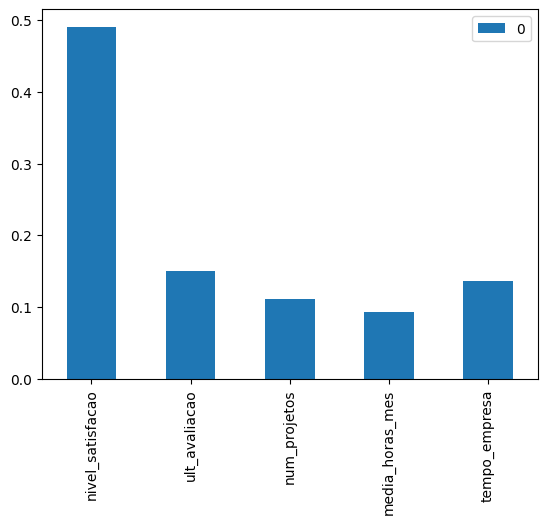

In [ ]:
pd.DataFrame(tree.feature_importances_, index = X.columns)[:5].plot(kind='bar')

In [ ]:
import pickle

In [ ]:
pickle.dump(tree, open('modelo_rh.pickle', 'wb'))

In [ ]:
tree_salva = pickle.load(open('modelo_rh.pickle', 'rb'))

In [ ]:
tree_salva

DecisionTreeClassifier()

In [ ]:
tree_salva.predict(X_test)

array([0., 1., 0., ..., 0., 1., 0.])